In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### EDA

In [12]:
df = pd.read_csv("./anomaly.csv")
df.sample(5)

,timestamp,value,predicted
2052,1396947600,68.00000,18.397915
3153,1397277900,20.00000,21.046816
521,1396488300,20.00000,20.002062
2341,1397034300,68.00000,70.338710
968,1396622400,79.99616,81.252396


In [4]:
df.shape

(3960, 3)

In [5]:
df.columns

Index(['timestamp', 'value', 'predicted'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3960 non-null   int64  
 1   value      3960 non-null   float64
 2   predicted  3960 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 92.9 KB


### Handling Null values or Duplicate values if any

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

timestamp    0
value        0
predicted    0
dtype: int64

### Establishing the relationship b/w value and predicted feature

In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
features = df.drop(columns=['value'])
target = df['value']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)

C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

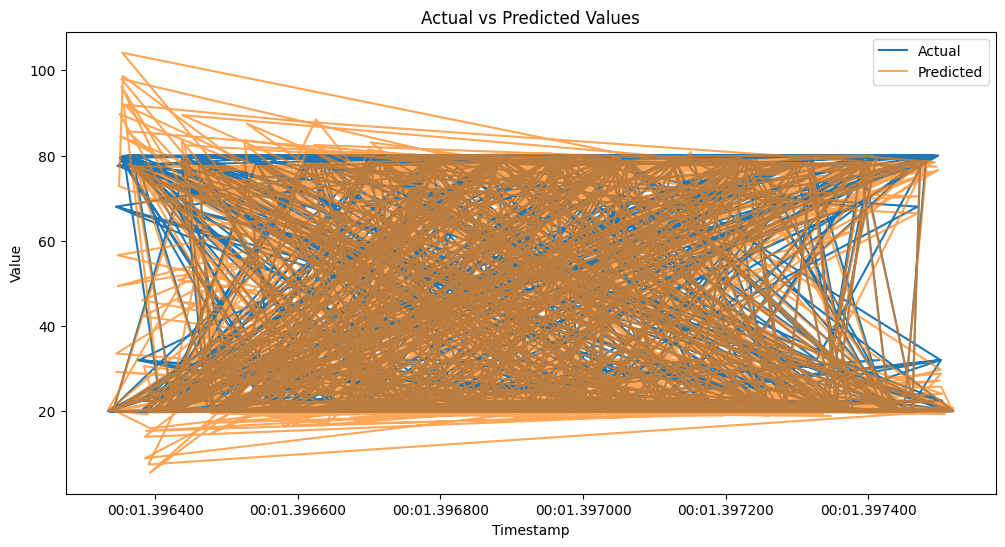

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

In [29]:
relationship_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
correlation = relationship_df.corr()

In [31]:
score

0.9153146983395211

In [32]:
correlation

,Actual,Predicted
Actual,1.000000,0.956795
Predicted,0.956795,1.000000
